In [1]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.MTPG import PolicyGradient
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')
env.seed(1)     # reproducible, general Policy gradient has high variance
agent = PolicyGradient(n_actions=env.action_space.n,
                       n_features=env.observation_space.shape[0],
                       learning_rate=0.02,
                       reward_decay=0.99,)

In [3]:
final_rewards = []
for i_episode in tqdm(range(1000)):
    observation = env.reset()
    rewards = []
    for t in range(200):
        action = agent.choose_action(observation)

        observation_, reward, done, info = env.step(action)
        rewards.append(reward)

        agent.store_transition(observation, action, reward)

        if done:
            ep_rs_sum = sum(agent.ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
                
            vt = agent.learn()
            break

        observation = observation_
    final_rewards.append(np.sum(rewards))

100%|██████████| 1000/1000 [03:19<00:00,  5.01it/s]


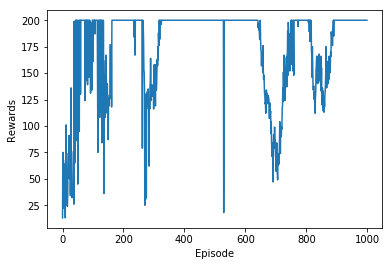

In [4]:
x = np.arange(len(final_rewards))
plt.plot(x, final_rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/MTPG-cartpole.png')